In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import g

%run educmm_lab1_qubic_spline.ipynb

In [2]:
def res_function(x):
    y_spline = []                        #значения кубического сплайна в точках x_spline[i], i = 0, ..., n
    d_y_spline = []                      #значения первой производной кубического сплайна в точках x_spline[i], i = 0, ..., n
    res_func = []                        #значения подынтегральной функции f(x) в точках x_spline[i], i = 0, ..., n
    for i in range(len(x)):
        y_spline.append(qubic_spline(x[i], coeff, x_for_interpol, y_for_interpol))
        d_y_spline.append(d_qubic_spline(x[i], coeff, x_for_interpol, y_for_interpol))
        res_func.append(np.sqrt((1. + d_y_spline[i]**2.) / (2. * g * y_spline[i])))
      
    return res_func

In [4]:
def composite_trapezoid(a, b, n, func):
    x = np.linspace(a, b, n + 1)
    f = func(x)
    h = (b - a) / n
    return  h/2.*(f[0] + 2*np.sum(f[1:-1]) + f[-1])

In [5]:
def composite_simpson(a, b, n, func):
    if n%2 != 0:
        n+=1
    x = np.linspace(a, b, n + 1)
    f = func(x)
    h = (b - a) / n
    return h/3.*(f[0] + 2*np.sum(f[2:-1:2]) + 4*np.sum(f[1::2]) + f[-1])

In [6]:
def error_simpson(a, b, n):
    return np.abs(exact_integral - composite_simpson(a, b, n, res_function))

In [7]:
def error_trapezoid(a, b, n):
    return np.abs(exact_integral - composite_trapezoid(a, b, n, res_function))

In [24]:
C = 1.03439984
T = 1.75418438

t = np.linspace(1e-1, T, 10000)
    
x = [C*(t[x] - 1/2*np.sin(2*t[x])) for x in range(len(t))]
y = [C*(1/2 - 1/2*np.cos(2*t[y])) for y in range(len(t))]

In [11]:
def nearest_index(x, x_new):
    index = np.searchsorted(x, x_new)
    if np.fabs(x[index-1]-x_new) < np.fabs(x[index]-x_new):
        return index-1
    else:
        return index

In [14]:
x_equid = np.linspace(x[0], x[-1], 500)

index_for_x = []                              #индексы для равноудалённых х

for i in range(len(x_equid)):
    index = nearest_index(x, x_equid[i])
    index_for_x.append(index)
    
x_for_interpol=[]   #равноудалённые x
y_for_interpol=[]   #y для равноудалённых x

for i in range(len(index_for_x)):             
    x_for_interpol.append(x[index_for_x[i]])
    y_for_interpol.append(y[index_for_x[i]])

coeff = qubic_spline_coeff(x_for_interpol, y_for_interpol)      #коэффициенты для кубического сплайна

a = x_for_interpol[0]
b = x_for_interpol[-1]
exact_integral = np.sqrt(2*C/g)*(t[index_for_x[-1]]-t[index_for_x[0]])     #точное значение инетграла

In [23]:
def error_show():
    fig, ax = plt.subplots(figsize=(12,8))
    h = np.logspace(-4, -1, 15)
    n = np.array((b-a)/h, dtype=int)
    ax.loglog((b-a)/n, [error_simpson(a, b, n_) for n_ in n], 'o', label = r'$simpson$')
    ax.loglog((b-a)/n, [error_trapezoid(a, b, n_) for n_ in n], 'o', label = r'$trapezoid$')
    ax.set_xlabel(r'$h$', fontsize=16)
    ax.set_ylabel(r'$E$', fontsize=16)
    ax.legend(fontsize=16)
    ax.grid()

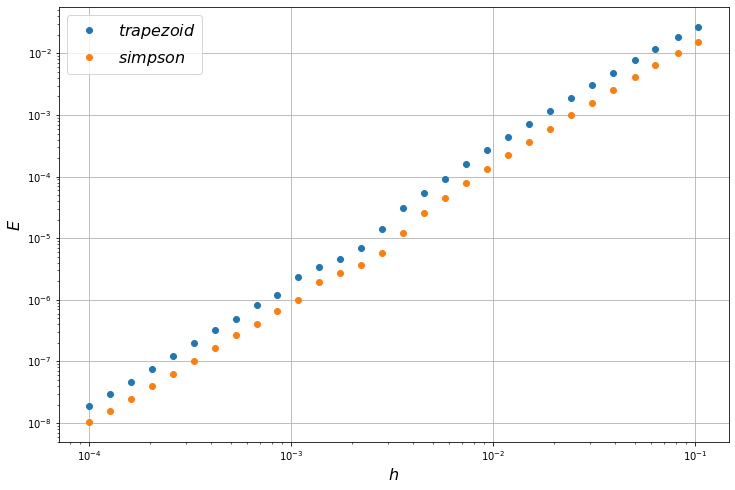

In [10]:
error_show()